<a href="https://colab.research.google.com/github/Priya378/Internet-Analysis-Project/blob/master/Internet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Making necessary imports**

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install IPython

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import IPython.display as d

In [ ]:
datadf = pd.read_csv("data.csv")
d.display(datadf.head())

,Unnamed: 0,Server,Latency,Jitter,Download,Upload,Packet Loss
0,Tue Jun 22 12:38:01,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
1,Tue Jun 22 12:40:01,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
2,Tue Jun 22 12:42:01,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
3,Tue Jun 22 12:44:01,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
4,Tue Jun 22 12:46:01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datadf.rename(columns={"Unnamed: 0":"Time"},inplace=True)
d.display(datadf.head())

,Time,Server,Latency,Jitter,Download,Upload,Packet Loss
0,Tue Jun 22 12:38:01,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
1,Tue Jun 22 12:40:01,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
2,Tue Jun 22 12:42:01,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
3,Tue Jun 22 12:44:01,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
4,Tue Jun 22 12:46:01,NaN,NaN,NaN,NaN,NaN,NaN


**Best Conditions**:
- `Latency: lower the better
- Jitter: lower the better
- Download: higher the better
- Upload: higher the better
- Packet Loss: 0.0%

In [ ]:
print(datadf.shape)

(4869, 7)


**Dataframe has 4869 entries having data spanning a week.**

## **Outages and Server analysis**

When network outages happen, all the attributes like latency, jitter, download, upload, packet loss are null because of complete or partial failure of the internet services. In the below figure (obtained from statistics.log) we can see network outages from line 2576 onwards.

Only values corresponding to all the attributes are stored in the csv file for the ease of analysis.

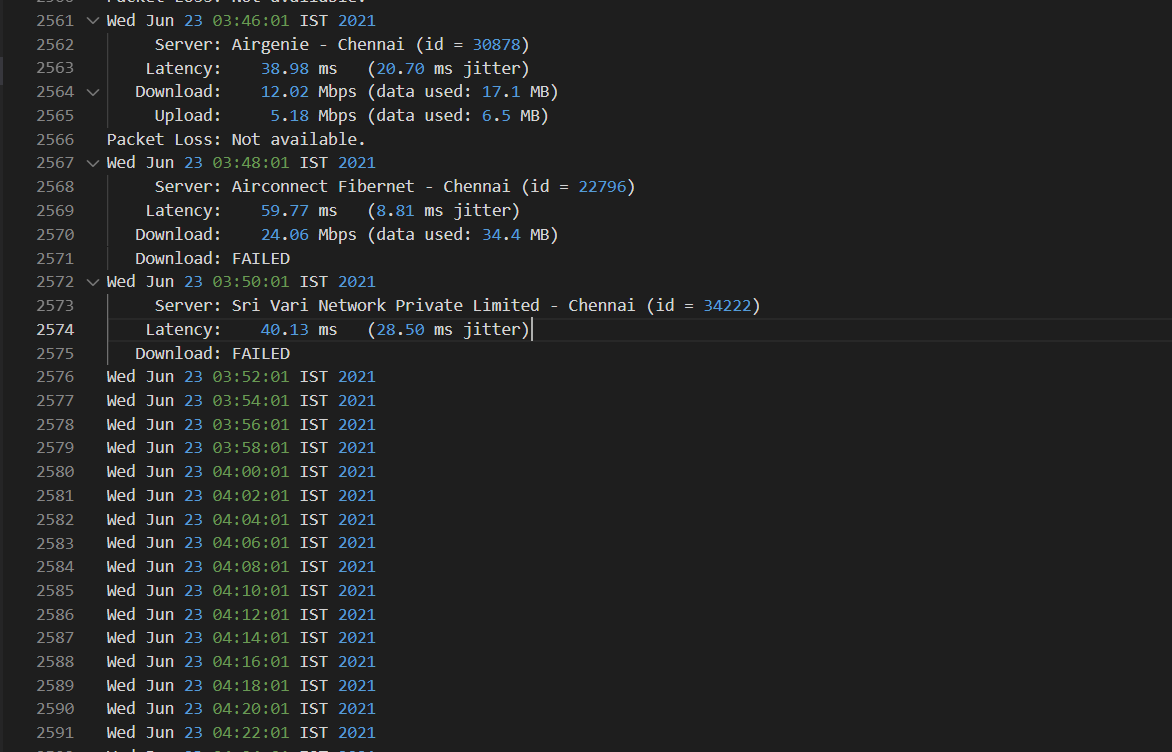

In [ ]:
outagedf=datadf.set_index("Time",inplace=False)
d.display(outagedf.head())

,Server,Latency,Jitter,Download,Upload,Packet Loss
Time,,,,,,
Tue Jun 22 12:38:01,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
Tue Jun 22 12:40:01,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
Tue Jun 22 12:42:01,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
Tue Jun 22 12:44:01,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
Tue Jun 22 12:46:01,NaN,NaN,NaN,NaN,NaN,NaN


**Iterating over the rows of the dataframe to**:

*   Find out the most connected server
*   Hour corresponding to maximum outages
*   Day corresponding to maximum outages

**If values in all the columns for a row are absent, we can say that network outage happened during that time.**



In [ ]:
day_outages={}
hour_outages={}
days=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
hours=[i for i in range(24)]
columns=[x for x in outagedf]
columns.remove("Server")
servers={}

for i in days:
  day_outages[i]=0

for i in hours:
  hour_outages[str(i)+":00"]=0

for i in outagedf.index.values:
  f=0
  if(type(outagedf.loc[i]["Server"])==str):
    servers[outagedf.loc[i]["Server"]]=servers.get(outagedf.loc[i]["Server"],0)+1
  for x in columns:
    if(not np.isnan(outagedf.loc[i][x])):
      f=1
  if(f==0):
    day_outages[i[:3]]+=1
    hour_outages[str(int(i[11:13]))+":00"]+=1

In [ ]:
hour_outagedf=pd.DataFrame({"Count":hour_outages}).sort_values(["Count"],ascending=0)
print("Number of outages in each hour:")
d.display(hour_outagedf)

Number of outages in each hour:


,Count
8:00,127
6:00,122
7:00,121
5:00,120
4:00,104
9:00,39
14:00,25
3:00,14
13:00,5
12:00,2


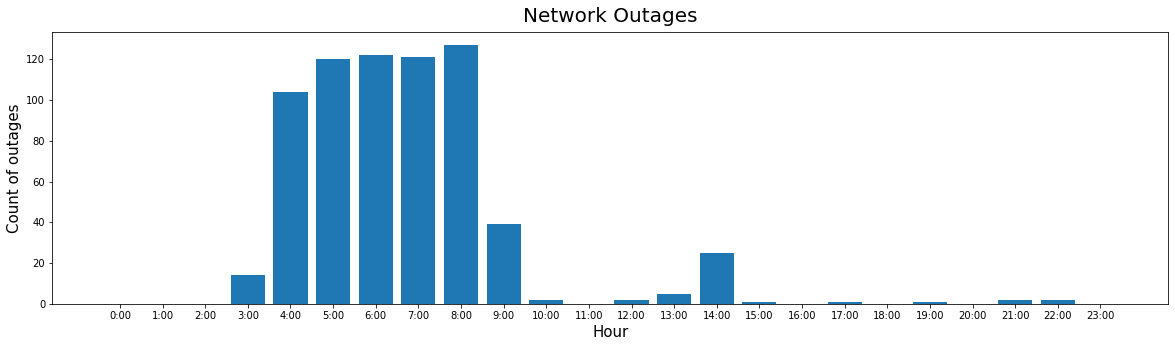

In [ ]:
keys=hour_outages.keys()
values=hour_outages.values()
fig=plt.gcf()
fig.set_size_inches(20,5)
plt.bar(keys,values)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Count of outages",fontsize=15)
plt.title("Network Outages",pad='10',fontsize=20)
plt.show()

**Network outages happened maximum times at 8:00 IST. No outages were observed at 0:00 IST, 2:00 IST, 23:00 IST, 1:00 IST, 18:00 IST, 16:00 IST, 11:00 IST and 20 IST.**

In [ ]:
day_outagedf=pd.DataFrame({"Count of Days":day_outages}).sort_values(["Count of Days"],ascending=0)
print("Number of outages in each week day:")
d.display(day_outagedf)

Number of outages in each week day:


,Count of Days
Tue,198
Sat,175
Wed,154
Fri,109
Mon,46
Sun,6
Thu,0


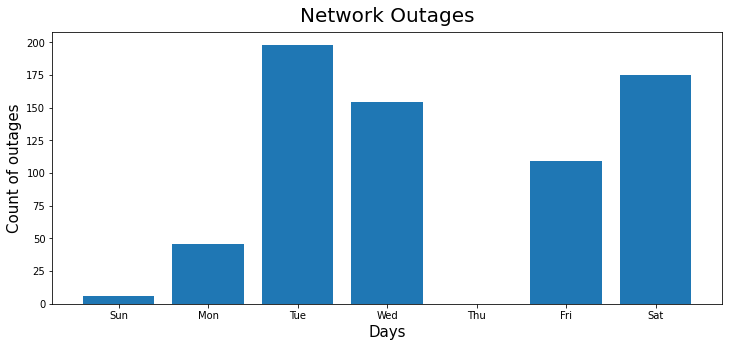

In [ ]:
keys=day_outages.keys()
values=day_outages.values()
fig=plt.gcf()
fig.set_size_inches(12,5)
plt.bar(keys,values)
plt.xlabel("Days",fontsize=15)
plt.ylabel("Count of outages",fontsize=15)
plt.title("Network Outages",pad='10',fontsize=20)
plt.show()

**We can see that thursday had got least number of network outages and tuesday had got the most.**


In [ ]:
connections=pd.DataFrame({"Connections":servers})
connections=connections.sort_values(["Connections"], ascending =0)
print("Connections each server made:")
d.display(connections)

Connections each server made:


,Connections
Airtel Broadband - Chennai,697
Airconnect Fibernet - Chennai,563
Airgenie - Chennai,510
TataSky Broadband Private Limited - Chennai,406
ACT Fibernet - Chennai,399
Shyam Spectra - Chennai,399
Sri Vari Network Private Limited - Chennai,391
Cherrinet - K Net Solutions Pvt Ltd - Chennai,375
Jio - Chennai,329
Pulse Telesystems - Chennai,41


 **Most connected server is Airtel Broadband - Chennai**

##**Analysis of days and hours**

In [ ]:
df=datadf.copy()
df.insert (0,"Day",[row[:3] for row in df["Time"]])
df.insert (1,"Hour",[row[11:13]+":00" for row in df["Time"]])
d.display(df)

,Day,Hour,Time,Server,Latency,Jitter,Download,Upload,Packet Loss
0,Tue,12:00,Tue Jun 22 12:38:01,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
1,Tue,12:00,Tue Jun 22 12:40:01,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
2,Tue,12:00,Tue Jun 22 12:42:01,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
3,Tue,12:00,Tue Jun 22 12:44:01,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
4,Tue,12:00,Tue Jun 22 12:46:01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4864,Tue,13:00,Tue Jun 29 13:12:02,Shyam Spectra - Chennai,53.80,16.12,7.20,3.49,0.0
4865,Tue,13:00,Tue Jun 29 13:14:01,Airtel Broadband - Chennai,55.54,6.93,5.91,2.90,NaN
4866,Tue,13:00,Tue Jun 29 13:16:01,TATASky Broadband Pvt Ltd - Bangalore,73.10,44.00,1.46,2.64,0.0
4867,Tue,13:00,Tue Jun 29 13:18:01,ACT Fibernet - Bangalore,72.41,44.61,5.77,2.66,0.4


### **Analysis of days**

In [ ]:
daydf=df.groupby("Day").agg({
  "Latency":"mean",
  "Jitter":"mean",
  "Download":"mean",
  "Upload":"mean",
 "Packet Loss":"mean"}).round(2)

In [ ]:
d.display(daydf)

,Latency,Jitter,Download,Upload,Packet Loss
Day,,,,,
Fri,52.96,21.00,8.00,2.76,0.47
Mon,58.22,23.13,7.66,2.52,0.61
Sat,55.75,20.79,6.53,2.55,0.46
Sun,52.36,23.82,9.68,2.76,0.52
Thu,49.67,21.43,8.14,2.47,0.42
Tue,59.42,19.88,7.00,2.53,0.46
Wed,52.35,23.74,7.02,2.38,0.55


In [ ]:
daydf_analyse=pd.DataFrame({"Minimum on":daydf.idxmin(),"Maximum on":daydf.idxmax()})

In [ ]:
d.display(daydf_analyse)

,Minimum on,Maximum on
Latency,Thu,Tue
Jitter,Tue,Sun
Download,Sat,Sun
Upload,Wed,Fri
Packet Loss,Thu,Mon


 **Conclusions:**

---




*   **Thursday** was the **best** in terms of **average latency**
*   **Tuesday** was the **worst** in terms of **average latency**

*   **Tuesday** was the **best** in terms of **average jitter**
*   **Sunday** was the **worst** in terms of **average jitter**

*   **Thursday** was the **best** in terms of **average packet loss**
*   **Monday** was the **worst** in terms of **average packet loss**

*   **Sunday** was the **best** in terms of **average download speed**
*   **Saturday** was the **worst** in terms of **average download speed**

*   **Friday** was the **best** in terms of **average upload speed**
*   **Wednesday** was the **worst** in terms of **average upload speed**




### **Analysis of hours**

In [ ]:
hourdf=df.groupby("Hour").agg({
  "Latency":"mean",
  "Jitter":"mean",
  "Download":"mean",
  "Upload":"mean",
 "Packet Loss":"mean"}).round(2)

In [ ]:
d.display(hourdf)

,Latency,Jitter,Download,Upload,Packet Loss
Hour,,,,,
00:00,46.96,20.73,9.16,3.97,0.25
01:00,44.73,21.57,12.67,4.44,0.44
02:00,45.66,21.35,16.49,4.93,0.43
03:00,45.90,21.22,18.22,4.88,0.63
04:00,46.04,18.79,19.40,4.65,0.41
05:00,48.50,20.71,17.68,3.76,0.51
06:00,45.16,21.43,12.91,3.89,0.07
07:00,47.50,21.30,10.70,3.28,1.30
08:00,44.80,27.01,8.21,2.80,0.12


In [ ]:
hourdf_analyse=pd.DataFrame({"Minimum at":hourdf.idxmin(),"Maximum at":hourdf.idxmax()})

In [ ]:
d.display(hourdf_analyse)

,Minimum at,Maximum at
Latency,01:00,09:00
Jitter,14:00,23:00
Download,22:00,04:00
Upload,20:00,02:00
Packet Loss,06:00,07:00


 **Conclusions:**

---




*   **01:00 IST** was the **best** in terms of **average latency**
*   **09:00 IST** was the **worst** in terms of **average latency**

*   **04:00 IST** was the **best** in terms of **average jitter**
*   **08:00 IST** was the **worst** in terms of **average jitter**

*   **06:00 IST** was the **best** in terms of **average packet loss**
*   **07:00 IST** was the **worst** in terms of **average packet loss**

*   **04:00 IST** was the **best** in terms of **average download speed**
*   **22:00 IST** was the **worst** in terms of **average download speed**

*   **02:00 IST** was the **best** in terms of **average upload speed**
*   **20:00 IST** was the **worst** in terms of **average upload speed**




## **Overall Analysis**

In [ ]:
d.display(df)

,Day,Hour,Time,Server,Latency,Jitter,Download,Upload,Packet Loss
0,Tue,12:00,Tue Jun 22 12:38:01,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
1,Tue,12:00,Tue Jun 22 12:40:01,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
2,Tue,12:00,Tue Jun 22 12:42:01,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
3,Tue,12:00,Tue Jun 22 12:44:01,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
4,Tue,12:00,Tue Jun 22 12:46:01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4864,Tue,13:00,Tue Jun 29 13:12:02,Shyam Spectra - Chennai,53.80,16.12,7.20,3.49,0.0
4865,Tue,13:00,Tue Jun 29 13:14:01,Airtel Broadband - Chennai,55.54,6.93,5.91,2.90,NaN
4866,Tue,13:00,Tue Jun 29 13:16:01,TATASky Broadband Pvt Ltd - Bangalore,73.10,44.00,1.46,2.64,0.0
4867,Tue,13:00,Tue Jun 29 13:18:01,ACT Fibernet - Bangalore,72.41,44.61,5.77,2.66,0.4


In [ ]:
analysed=df.groupby(["Day","Hour"]).agg({
   "Latency":"mean",
   "Jitter":"mean",
   "Download":"mean",
   "Upload":"mean",
   "Packet Loss":"mean"
}).round(2)

In [ ]:
d.display(analysed)

Latency  Jitter  Download  Upload  Packet Loss
Day Hour                                                 
Fri 00:00    57.83   15.94     12.25    3.86         0.51
    01:00    48.15   21.56     10.91    4.34         0.09
    02:00    41.38   21.92     18.05    5.30         0.58
    03:00    45.62   24.51     13.72    5.20         1.07
    04:00    43.73   22.51     18.96    5.52         0.37
...            ...     ...       ...     ...          ...
Wed 19:00    48.64   20.67      5.24    1.78         0.30
    20:00    58.53   30.98      3.51    0.78         1.18
    21:00    67.44   31.54      2.66    0.94         1.33
    22:00    63.96   14.92      2.01    1.23         0.41
    23:00    42.38   26.12      4.15    2.49         0.13

[164 rows x 5 columns]

In [ ]:
analysed.to_csv('analytics.csv', index=True)

In [ ]:
overall_df=analysed.groupby("Day").agg({
  "Latency":["min","idxmin","max","idxmax"],
  "Jitter":["min","idxmin","max","idxmax"],
  "Download":["min","idxmin","max","idxmax"],
  "Upload":["min","idxmin","max","idxmax"],
 "Packet Loss":["min","idxmin","max","idxmax"]})

In [ ]:
d.display(overall_df)

Latency                        ...   Packet Loss                    
        min        idxmin     max  ...        idxmin   max        idxmax
Day                                ...                                  
Fri   41.38  (Fri, 02:00)   75.39  ...  (Fri, 18:00)  2.26  (Fri, 12:00)
Mon   45.27  (Mon, 00:00)   83.67  ...  (Mon, 19:00)  1.99  (Mon, 13:00)
Sat   40.70  (Sat, 02:00)  167.01  ...  (Sat, 17:00)  1.88  (Sat, 15:00)
Sun   43.97  (Sun, 10:00)   84.95  ...  (Sun, 10:00)  5.18  (Sun, 19:00)
Thu   40.08  (Thu, 02:00)   68.62  ...  (Thu, 01:00)  1.79  (Thu, 18:00)
Tue   42.84  (Tue, 03:00)   79.50  ...  (Tue, 11:00)  3.00  (Tue, 01:00)
Wed   41.69  (Wed, 03:00)   67.48  ...  (Wed, 00:00)  1.47  (Wed, 18:00)

[7 rows x 20 columns]

We are replacing tuple (Day, Hour) with Hour alone, and renaming the dataframe:

In [ ]:
columns=["Latency","Jitter","Download","Upload","Packet Loss"]
for col in columns:
  overall_df[(col,"idxmin")]=analysed.loc[[x for x in overall_df[col]["idxmin"]]].index.get_level_values(1)
  overall_df[(col,"idxmax")]=analysed.loc[[x for x in overall_df[col]["idxmax"]]].index.get_level_values(1)
  #print(overall_df2[(col,"idxmin")])
  #print(analysedf2.loc[[x for x in overall_df2[col]["idxmin"]]].index.get_level_values(1))

In [ ]:
overall_df=overall_df.rename(columns={
    "idxmin":"Hour (Min)",
    "idxmax":"Hour (Max)"
})

In [ ]:
d.display(overall_df)

Latency                     ... Packet Loss                 
        min Hour (Min)     max  ...  Hour (Min)   max Hour (Max)
Day                             ...                             
Fri   41.38      02:00   75.39  ...       18:00  2.26      12:00
Mon   45.27      00:00   83.67  ...       19:00  1.99      13:00
Sat   40.70      02:00  167.01  ...       17:00  1.88      15:00
Sun   43.97      10:00   84.95  ...       10:00  5.18      19:00
Thu   40.08      02:00   68.62  ...       01:00  1.79      18:00
Tue   42.84      03:00   79.50  ...       11:00  3.00      01:00
Wed   41.69      03:00   67.48  ...       00:00  1.47      18:00

[7 rows x 20 columns]

In [ ]:
final_df=overall_df.drop(['min', 'max'],level=1, axis=1)

In [ ]:
d.display(final_df)

Latency                Jitter  ...     Upload Packet Loss           
    Hour (Min) Hour (Max) Hour (Min)  ... Hour (Max)  Hour (Min) Hour (Max)
Day                                   ...                                  
Fri      02:00      11:00      13:00  ...      04:00       18:00      12:00
Mon      00:00      11:00      04:00  ...      02:00       19:00      13:00
Sat      02:00      09:00      20:00  ...      03:00       17:00      15:00
Sun      10:00      20:00      15:00  ...      05:00       10:00      19:00
Thu      02:00      22:00      21:00  ...      03:00       01:00      18:00
Tue      03:00      10:00      16:00  ...      02:00       11:00      01:00
Wed      03:00      08:00      22:00  ...      03:00       00:00      18:00

[7 rows x 10 columns]

* Above table provides the best and worst timings for various 
attributes for each and every day.













In [ ]:
Min_Latency_Day=overall_df["Latency","min"].idxmin()
Corresponding_hour=overall_df.loc[overall_df["Latency","min"].idxmin()]["Latency"]["Hour (Min)"]
print("Best day and hour for low latency activities: ",Min_Latency_Day,"and",Corresponding_hour,"IST.")

Best day and hour for low latency activities:  Thu and 02:00 IST.
